In [1]:
from pandas import read_csv
from datetime import datetime

# load data
def parse(x):
    return datetime.strptime(x, '%Y %m %d %H')

dataset = read_csv('airquality.csv',  parse_dates = [['year', 'month', 'day', 'hour']], index_col=0, date_parser=parse)
dataset

,No,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
year_month_day_hour,,,,,,,,,
2010-01-01 00:00:00,1,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00,2,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00,3,NaN,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01 03:00:00,4,NaN,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01 04:00:00,5,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,43820,8.0,-23,-2.0,1034.0,NW,231.97,0,0
2014-12-31 20:00:00,43821,10.0,-22,-3.0,1034.0,NW,237.78,0,0
2014-12-31 21:00:00,43822,10.0,-22,-3.0,1034.0,NW,242.70,0,0


In [2]:
dataset.drop('No', axis=1, inplace=True)

# manually specify column names
dataset.columns = ['pollution', 'dew', 'temp', 'press', 'wnd_dir', 'wnd_spd', 'snow', 'rain']
dataset.index.name = 'date'

# the pollution values for the first 24 hours are NaN
# the corresponding rows can be removed as they are at the beginning of the data
dataset = dataset[24:]
print(dataset)

# other NaN values cannot be removed as the time sequentiality would be lost 
# mark them with mean of the column
dataset['pollution'].fillna(dataset['pollution'].mean(), inplace=True)

# summarize first 5 rows
dataset.head()

                     pollution  dew  temp   press wnd_dir  wnd_spd  snow  rain
date                                                                          
2010-01-02 00:00:00      129.0  -16  -4.0  1020.0      SE     1.79     0     0
2010-01-02 01:00:00      148.0  -15  -4.0  1020.0      SE     2.68     0     0
2010-01-02 02:00:00      159.0  -11  -5.0  1021.0      SE     3.57     0     0
2010-01-02 03:00:00      181.0   -7  -5.0  1022.0      SE     5.36     1     0
2010-01-02 04:00:00      138.0   -7  -5.0  1022.0      SE     6.25     2     0
...                        ...  ...   ...     ...     ...      ...   ...   ...
2014-12-31 19:00:00        8.0  -23  -2.0  1034.0      NW   231.97     0     0
2014-12-31 20:00:00       10.0  -22  -3.0  1034.0      NW   237.78     0     0
2014-12-31 21:00:00       10.0  -22  -3.0  1034.0      NW   242.70     0     0
2014-12-31 22:00:00        8.0  -22  -4.0  1034.0      NW   246.72     0     0
2014-12-31 23:00:00       12.0  -21  -3.0  1034.0   

C:\Users\20215268\AppData\Local\Temp/ipykernel_32832/2870970613.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['pollution'].fillna(dataset['pollution'].mean(), inplace=True)


,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
date,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# prepare data for lstm

# get values from dataframe as numpy array
values = dataset.values
print(values)

# encode wind direction to integer values
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
print(values[:, 4])

# ensure all data is float
values = values.astype('float32')

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
scaled

[[129.0 -16 -4.0 ... 1.79 0 0]
 [148.0 -15 -4.0 ... 2.68 0 0]
 [159.0 -11 -5.0 ... 3.57 0 0]
 ...
 [10.0 -22 -3.0 ... 242.7 0 0]
 [8.0 -22 -4.0 ... 246.72 0 0]
 [12.0 -21 -3.0 ... 249.85 0 0]]
[2 2 2 ... 1 1 1]


array([[0.12977867, 0.35294122, 0.24590163, ..., 0.00229001, 0.        ,
        0.        ],
       [0.14889336, 0.36764708, 0.24590163, ..., 0.00381099, 0.        ,
        0.        ],
       [0.15995975, 0.4264706 , 0.22950819, ..., 0.00533197, 0.        ,
        0.        ],
       ...,
       [0.01006036, 0.2647059 , 0.26229507, ..., 0.41399646, 0.        ,
        0.        ],
       [0.00804829, 0.2647059 , 0.24590163, ..., 0.4208665 , 0.        ,
        0.        ],
       [0.01207243, 0.2794118 , 0.26229507, ..., 0.42621556, 0.        ,
        0.        ]], dtype=float32)

In [4]:
from pandas import DataFrame
from pandas import concat
 
# convert series to supervised learning
# n_in: number of timestep to consider as input
# n_out: number of timestep to be predicted
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = data.shape[1]
    df = DataFrame(data)
    cols, names = [], []
    
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df[0].shift(-i))
        if i == 0:
#             names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
            names += [('var1(t)')]
        else:
#             names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
            names += [('var1(t+%d)' % (i))]
    
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    
    return agg

In [5]:
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)

print(reframed)

       var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1       0.129779   0.352941   0.245902   0.527273   0.666667   0.002290   
2       0.148893   0.367647   0.245902   0.527273   0.666667   0.003811   
3       0.159960   0.426471   0.229508   0.545454   0.666667   0.005332   
4       0.182093   0.485294   0.229508   0.563637   0.666667   0.008391   
5       0.138833   0.485294   0.229508   0.563637   0.666667   0.009912   
...          ...        ...        ...        ...        ...        ...   
43795   0.010060   0.264706   0.278689   0.763638   0.333333   0.385730   
43796   0.008048   0.250000   0.278689   0.781818   0.333333   0.395659   
43797   0.010060   0.264706   0.262295   0.781818   0.333333   0.405588   
43798   0.010060   0.264706   0.262295   0.781818   0.333333   0.413996   
43799   0.008048   0.264706   0.245902   0.781818   0.333333   0.420866   

       var7(t-1)  var8(t-1)   var1(t)  
1       0.000000        0.0  0.148893  
2       0.000000   

In [6]:
# split into train and test sets
values = reframed.values
n_train_hours = 365 * 24
n_val_hours = 365 * 24
train = values[:n_train_hours, :]
val = values[n_train_hours:n_train_hours+n_val_hours, :]
test = values[n_train_hours+n_val_hours:, :]

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
val_X, val_y = val[:, :-1], val[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
val_X = val_X.reshape((val_X.shape[0], 1, val_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, val_X.shape, val_y.shape, test_X.shape, test_y.shape)

(8760, 1, 8) (8760,) (8760, 1, 8) (8760,) (26279, 1, 8) (26279,)


In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=64, validation_data=(val_X, val_y), verbose=2, shuffle=False)

Epoch 1/50
137/137 - 2s - loss: 0.0554 - val_loss: 0.0481
Epoch 2/50
137/137 - 0s - loss: 0.0373 - val_loss: 0.0534
Epoch 3/50
137/137 - 0s - loss: 0.0211 - val_loss: 0.0361
Epoch 4/50
137/137 - 0s - loss: 0.0158 - val_loss: 0.0263
Epoch 5/50
137/137 - 0s - loss: 0.0145 - val_loss: 0.0196
Epoch 6/50
137/137 - 0s - loss: 0.0142 - val_loss: 0.0166
Epoch 7/50
137/137 - 0s - loss: 0.0142 - val_loss: 0.0163
Epoch 8/50
137/137 - 0s - loss: 0.0142 - val_loss: 0.0155
Epoch 9/50
137/137 - 0s - loss: 0.0142 - val_loss: 0.0147
Epoch 10/50
137/137 - 0s - loss: 0.0143 - val_loss: 0.0143
Epoch 11/50
137/137 - 0s - loss: 0.0142 - val_loss: 0.0139
Epoch 12/50
137/137 - 0s - loss: 0.0143 - val_loss: 0.0141
Epoch 13/50
137/137 - 0s - loss: 0.0142 - val_loss: 0.0146
Epoch 14/50
137/137 - 0s - loss: 0.0141 - val_loss: 0.0140
Epoch 15/50
137/137 - 0s - loss: 0.0142 - val_loss: 0.0141
Epoch 16/50
137/137 - 0s - loss: 0.0141 - val_loss: 0.0141
Epoch 17/50
137/137 - 0s - loss: 0.0140 - val_loss: 0.0141
Epoch 

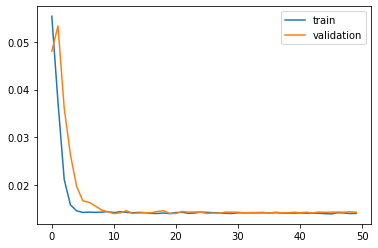

In [8]:
from matplotlib import pyplot as plt

# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

In [9]:
from numpy import concatenate
from math import sqrt
from sklearn.metrics import mean_squared_error

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 25.205
